# Abstract

In this project we will try to classify fake and genuine bank notes using the features in the dataset.

# Importing Libraries

In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Loading the Data in

In [549]:
df = pd.read_csv('fake_bills.csv', sep=';')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


# Exploratory Data Analysis

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [551]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


# Data Exploration and Preprocessing

### Handling Missing Values

We have 37 missing values in the margin low column and since this is quite small compared to the dataset we can just drop all the rows with those missing values.

In [552]:
df[df.isnull().any(axis=1)].head() # null rows

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [553]:
df = df.dropna() # dropping rows with missing data

In [554]:
df.info() # no more missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


### Data Visualisation

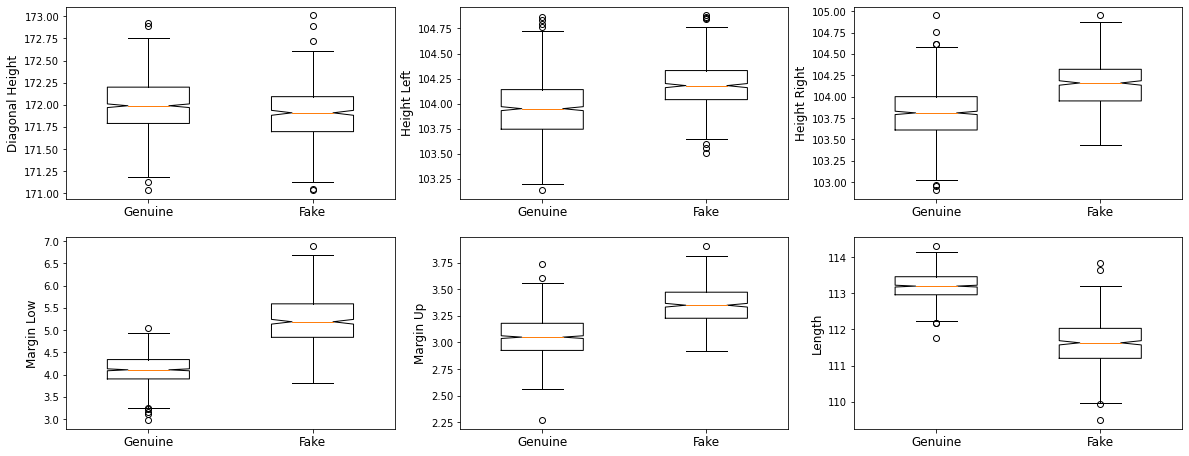

In [555]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
genuine = df[df.is_genuine == True]
fake =  df[df.is_genuine == False]
plt.boxplot ([ genuine.diagonal ,fake.diagonal],notch=True ,widths
=(0.5 ,0.5))
plt.xticks([1, 2], ['Genuine', 'Fake'], fontsize=12)
plt.ylabel('Diagonal Height', fontsize=12)
plt.subplot(3,3,2)
genuine = df[df.is_genuine == True]
fake =  df[df.is_genuine == False]
plt.boxplot ([ genuine.height_left ,fake.height_left],notch=True ,widths
=(0.5 ,0.5))
plt.xticks([1, 2], ['Genuine', 'Fake'], fontsize=12)
plt.ylabel('Height Left', fontsize=12)
plt.subplot(3,3,3)
genuine = df[df.is_genuine == True]
fake =  df[df.is_genuine == False]
plt.boxplot ([ genuine.height_right ,fake.height_right],notch=True ,widths
=(0.5 ,0.5))
plt.xticks([1, 2], ['Genuine', 'Fake'], fontsize=12)
plt.ylabel('Height Right', fontsize=12)
plt.subplot(3,3,4)
genuine = df[df.is_genuine == True]
fake =  df[df.is_genuine == False]
plt.boxplot ([ genuine.margin_low ,fake.margin_low],notch=True ,widths
=(0.5 ,0.5))
plt.xticks([1, 2], ['Genuine', 'Fake'], fontsize=12)
plt.ylabel('Margin Low', fontsize=12)
plt.subplot(3,3,5)
genuine = df[df.is_genuine == True]
fake =  df[df.is_genuine == False]
plt.boxplot ([ genuine.margin_up ,fake.margin_up],notch=True ,widths
=(0.5 ,0.5))
plt.xticks([1, 2], ['Genuine', 'Fake'], fontsize=12)
plt.ylabel('Margin Up', fontsize=12)
plt.subplot(3,3,6)
genuine = df[df.is_genuine == True]
fake =  df[df.is_genuine == False]
plt.boxplot ([ genuine.length ,fake.length],notch=True ,widths
=(0.5 ,0.5))
plt.xticks([1, 2], ['Genuine', 'Fake'], fontsize=12)
plt.ylabel('Length', fontsize=12)
plt.show()

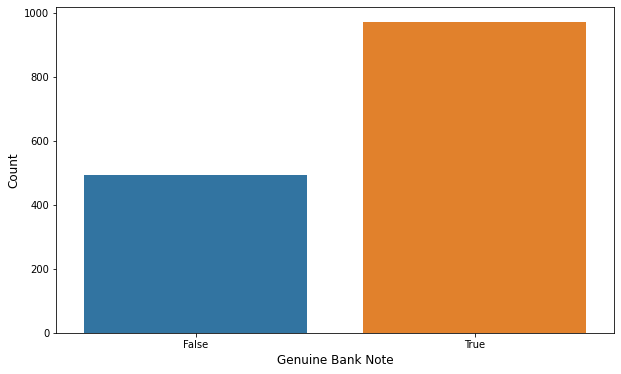

In [556]:
plt.figure(figsize=(10, 6))
df['is_genuine'].value_counts() # class inbalance
sns.countplot(x=df['is_genuine'])
plt.xlabel('Genuine Bank Note', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Data Transformation

#### Encoding Categorical Variables

In [557]:
DICT = {False: 0, True: 1}
df = df.replace(DICT) 

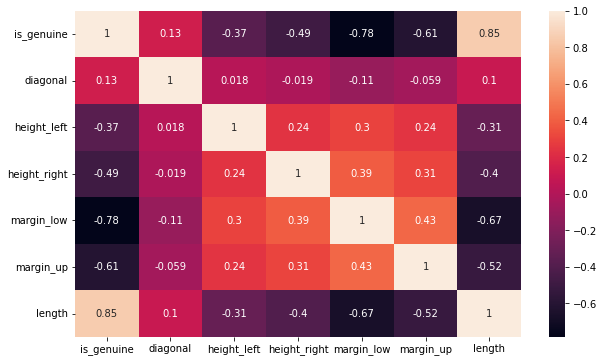

In [558]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

Few things to note here, the length of genuine notes tend to be a lot longer than fake ones and this can also be seen in the boxplot above. The margin up length of fake notes tends to be greater than genuine notes. In fact notes with bigger margins tend to be fake.

#### Standardising the Dataset

In [559]:
from sklearn.preprocessing import StandardScaler

In [560]:
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

In [561]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: is_genuine, Length: 1463, dtype: int64

In [562]:
scaler = StandardScaler()

In [563]:
df = scaler.fit_transform(X)

# Splitting the Data

In [564]:
from sklearn.model_selection import train_test_split

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

# Model Selection

since we have a binary classification problem a good model to train the dataset is a logistic regression classifier.

In [566]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [567]:
LR = LogisticRegression()

In [568]:
LR.fit(X_train, y_train)

LogisticRegression()

In [569]:
y_train_pred = LR.predict(X_train)

In [570]:
train_score = accuracy_score(y_train, y_train_pred)
train_score

0.9908814589665653

## Cross-Validation

In [571]:
from sklearn.model_selection import cross_val_score

In [572]:
val_scores = cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy')
print("""Scores:""", val_scores)
print("""Mean:""", val_scores.mean())
print("""Standard Deviation:""", val_scores.std() )

Scores: [0.99242424 0.98859316 0.98098859 0.99239544 0.99239544]
Mean: 0.9893593731996774
Standard Deviation: 0.004438149182952777


## GridSearch

In [573]:
from sklearn.model_selection import GridSearchCV

In [574]:
param_grid = {'C':[0.1, 0.5, 1, 5, 10],  'solver': ['liblinear', 'lbfgs'], 'max_iter': [500, 1000, 10000]}
lr = LogisticRegression()
gridsearch = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', return_train_score=True)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'max_iter': [500, 1000, 10000],
                         'solver': ['liblinear', 'lbfgs']},
             return_train_score=True, scoring='accuracy')

In [575]:
gridsearch.best_params_ # best parameters

{'C': 5, 'max_iter': 500, 'solver': 'liblinear'}

In [576]:
gridsearch.best_estimator_

LogisticRegression(C=5, max_iter=500, solver='liblinear')

In [577]:
results = gridsearch.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(np.sqrt(mean_score), params)

0.9935194436419316 {'C': 0.1, 'max_iter': 500, 'solver': 'liblinear'}
0.9931366616034315 {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}
0.9935194436419316 {'C': 0.1, 'max_iter': 1000, 'solver': 'liblinear'}
0.9931366616034315 {'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs'}
0.9935194436419316 {'C': 0.1, 'max_iter': 10000, 'solver': 'liblinear'}
0.9931366616034315 {'C': 0.1, 'max_iter': 10000, 'solver': 'lbfgs'}
0.9942831170878409 {'C': 0.5, 'max_iter': 500, 'solver': 'liblinear'}
0.9942831170878409 {'C': 0.5, 'max_iter': 500, 'solver': 'lbfgs'}
0.9942831170878409 {'C': 0.5, 'max_iter': 1000, 'solver': 'liblinear'}
0.9942831170878409 {'C': 0.5, 'max_iter': 1000, 'solver': 'lbfgs'}
0.9942831170878409 {'C': 0.5, 'max_iter': 10000, 'solver': 'liblinear'}
0.9942831170878409 {'C': 0.5, 'max_iter': 10000, 'solver': 'lbfgs'}
0.9946654579302919 {'C': 1, 'max_iter': 500, 'solver': 'liblinear'}
0.9946654579302919 {'C': 1, 'max_iter': 500, 'solver': 'lbfgs'}
0.9946654579302919 {'C': 1, 'max_iter': 

# Evaluating on the Test Data

In [578]:
best_model = gridsearch.best_estimator_

In [579]:
y_preds = best_model.predict(X_test)

In [580]:
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.9931972789115646

## Confusion Matrix

In [581]:
from sklearn.metrics import confusion_matrix

In [583]:
cm

array([[ 39.,   1.],
       [  0., 107.]])

## Precision and Recall

In [584]:
from sklearn.metrics import precision_score, recall_score

In [585]:
precision = precision_score(y_test, y_preds)
precision

0.9907407407407407

In [586]:
recall = recall_score(y_test, y_preds)
recall

1.0